In [1]:
import matplotlib.pyplot as plt
import sys
import pandas as pd
import networkx as nx
from operator import itemgetter
from itertools import combinations
import re

In [2]:
file = open('harry_potter.txt','rb')

In [3]:
text = file.read().decode(encoding='utf-8',errors='replace')

text = text.replace('\n',' ')
text = text.replace('\'','')
text = text.replace('-',' ')
text = text.lower()

def normalcharacters(x):
    for i in x:
        if(i<'a' or x>'z'):
            return False
    return True

text = ' '.join([x for x in text.split() if(normalcharacters(x))])
print(text)

harry potter and the sorcerers stone chapter one the boy who lived and of number privet were proud to say that they were perfectly thank you very they were the last people youd expect to be involved in anything strange or because they just didnt hold with such dursley was the director of a firm called which made he was a beefy man with hardly any although he did have a very large dursley was thin and blonde and had nearly twice the usual amount of which came in very useful as she spent so much of her time craning over garden spying on the the dursleys had a small son called dudley and in their opinion there was no finer boy the dursleys had everything they but they also had a and their greatest fear was that somebody would discover they didnt think they could bear it if anyone found out about the potter was dursleys but they hadnt met for several in dursley pretended she didnt have a because her sister and her good for nothing husband were as undursleyish as it was possible to the durs

In [4]:
words_list = text.split()

In [5]:
len(words_list)

63388

In [6]:
characters = ["Harry", "Hermione", "Ron", "Dursleys", "Dumbledore", "Voldemort", "Hagrid", "Draco", "McGonagall", "Snape", "Quirrell", "Neville", "Vernon", "Petunia", "Dudley", "Hedwig", "Ollivander", "Fred","George", "James","Lily","Molly","Percy","Filch","Nicolas","Oliver","Lee","Seamus","Charlie","Vincent","Gregory","Hooch","Fang","Fluffy","Griphook","Malkin","Cornelius","Lavender","Pomfrey","Katie","Angelina","Marcus","Irma","Alicia","Flitwick","Sprout","Binns","Piers","Augusta","Trevor","Ginny","Gellert","Tom","Sirius"]

In [7]:
characters = [x.lower() for x in characters]

In [8]:
print(characters)
len(characters)

['harry', 'hermione', 'ron', 'dursleys', 'dumbledore', 'voldemort', 'hagrid', 'draco', 'mcgonagall', 'snape', 'quirrell', 'neville', 'vernon', 'petunia', 'dudley', 'hedwig', 'ollivander', 'fred', 'george', 'james', 'lily', 'molly', 'percy', 'filch', 'nicolas', 'oliver', 'lee', 'seamus', 'charlie', 'vincent', 'gregory', 'hooch', 'fang', 'fluffy', 'griphook', 'malkin', 'cornelius', 'lavender', 'pomfrey', 'katie', 'angelina', 'marcus', 'irma', 'alicia', 'flitwick', 'sprout', 'binns', 'piers', 'augusta', 'trevor', 'ginny', 'gellert', 'tom', 'sirius']


54

In [9]:
links = []
window = 5
window_parts = []
for k in range(0,len(words_list),window):
    text_current = words_list[k:k+window]
    window_parts.append(' '.join(text_current))

print(window_parts)
for i in range(0,len(characters)):
    for j in range(i+1,len(characters)):
        count = 0
        for part in window_parts:
            if (len(re.findall(characters[i],part)) > 0) and (len(re.findall(characters[j],part)) > 0):
                count += 1
        edge = []
        edge.append(characters[i])
        edge.append(characters[j])
        edge.append(count)
        links.append(edge)        

['harry potter and the sorcerers', 'stone chapter one the boy', 'who lived and of number', 'privet were proud to say', 'that they were perfectly thank', 'you very they were the', 'last people youd expect to', 'be involved in anything strange', 'or because they just didnt', 'hold with such dursley was', 'the director of a firm', 'called which made he was', 'a beefy man with hardly', 'any although he did have', 'a very large dursley was', 'thin and blonde and had', 'nearly twice the usual amount', 'of which came in very', 'useful as she spent so', 'much of her time craning', 'over garden spying on the', 'the dursleys had a small', 'son called dudley and in', 'their opinion there was no', 'finer boy the dursleys had', 'everything they but they also', 'had a and their greatest', 'fear was that somebody would', 'discover they didnt think they', 'could bear it if anyone', 'found out about the potter', 'was dursleys but they hadnt', 'met for several in dursley', 'pretended she didnt have a', 

In [10]:
mygraph = nx.Graph()
mygraph.add_nodes_from(characters)
print(links)
for i in links:
    if(i[2]!=0):
        mygraph.add_edge(i[0],i[1],weight=int(i[2]))
print(nx.info(mygraph))

[['harry', 'hermione', 18], ['harry', 'ron', 45], ['harry', 'dursleys', 2], ['harry', 'dumbledore', 6], ['harry', 'voldemort', 1], ['harry', 'hagrid', 22], ['harry', 'draco', 1], ['harry', 'mcgonagall', 4], ['harry', 'snape', 7], ['harry', 'quirrell', 8], ['harry', 'neville', 5], ['harry', 'vernon', 7], ['harry', 'petunia', 0], ['harry', 'dudley', 8], ['harry', 'hedwig', 1], ['harry', 'ollivander', 2], ['harry', 'fred', 3], ['harry', 'george', 2], ['harry', 'james', 0], ['harry', 'lily', 0], ['harry', 'molly', 0], ['harry', 'percy', 0], ['harry', 'filch', 1], ['harry', 'nicolas', 0], ['harry', 'oliver', 0], ['harry', 'lee', 2], ['harry', 'seamus', 2], ['harry', 'charlie', 1], ['harry', 'vincent', 0], ['harry', 'gregory', 0], ['harry', 'hooch', 0], ['harry', 'fang', 1], ['harry', 'fluffy', 0], ['harry', 'griphook', 0], ['harry', 'malkin', 2], ['harry', 'cornelius', 0], ['harry', 'lavender', 0], ['harry', 'pomfrey', 0], ['harry', 'katie', 0], ['harry', 'angelina', 1], ['harry', 'marcus',

Question A


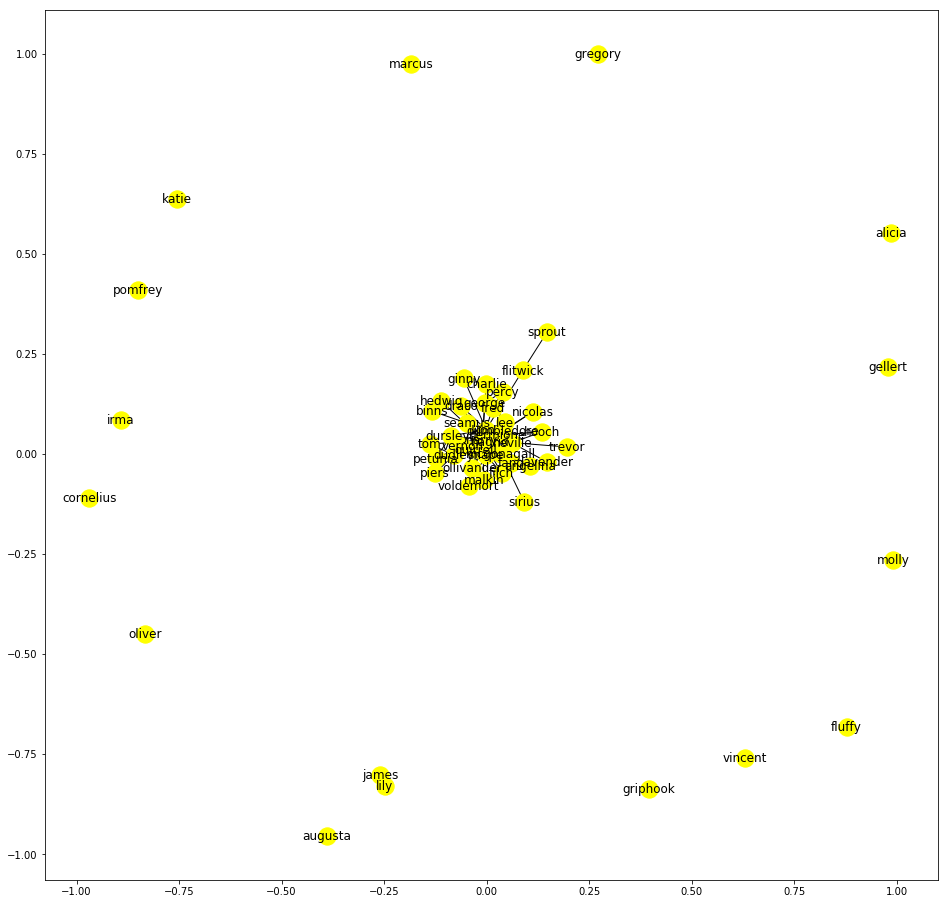

In [11]:
print('Question A')
plt.figure(3,figsize=(16,16)) 
nx.draw_networkx(mygraph,node_color='yellow',with_labels=True)
plt.show()

In [12]:
print('Question B')
print(mygraph.nodes)
print(mygraph.edges)
print(nx.get_edge_attributes(mygraph,'weight'))

Question B
['harry', 'hermione', 'ron', 'dursleys', 'dumbledore', 'voldemort', 'hagrid', 'draco', 'mcgonagall', 'snape', 'quirrell', 'neville', 'vernon', 'petunia', 'dudley', 'hedwig', 'ollivander', 'fred', 'george', 'james', 'lily', 'molly', 'percy', 'filch', 'nicolas', 'oliver', 'lee', 'seamus', 'charlie', 'vincent', 'gregory', 'hooch', 'fang', 'fluffy', 'griphook', 'malkin', 'cornelius', 'lavender', 'pomfrey', 'katie', 'angelina', 'marcus', 'irma', 'alicia', 'flitwick', 'sprout', 'binns', 'piers', 'augusta', 'trevor', 'ginny', 'gellert', 'tom', 'sirius']
[('harry', 'hermione'), ('harry', 'ron'), ('harry', 'dursleys'), ('harry', 'dumbledore'), ('harry', 'voldemort'), ('harry', 'hagrid'), ('harry', 'draco'), ('harry', 'mcgonagall'), ('harry', 'snape'), ('harry', 'quirrell'), ('harry', 'neville'), ('harry', 'vernon'), ('harry', 'dudley'), ('harry', 'hedwig'), ('harry', 'ollivander'), ('harry', 'fred'), ('harry', 'george'), ('harry', 'filch'), ('harry', 'lee'), ('harry', 'seamus'), ('ha

In [13]:
print('Question C')

print('Degree Centrality')
print(nx.degree_centrality(mygraph))
print()

print('Closeness Centrality')
print(nx.closeness_centrality(mygraph))
print()

print('Betweenness Centrality')
print(nx.betweenness_centrality(mygraph))
print()

print('Eigen Vector Centrality')
print(nx.eigenvector_centrality(mygraph))
print()

Question C
Degree Centrality
{'harry': 0.4716981132075472, 'hermione': 0.20754716981132074, 'ron': 0.2641509433962264, 'dursleys': 0.05660377358490566, 'dumbledore': 0.09433962264150943, 'voldemort': 0.03773584905660377, 'hagrid': 0.18867924528301885, 'draco': 0.03773584905660377, 'mcgonagall': 0.1509433962264151, 'snape': 0.1509433962264151, 'quirrell': 0.05660377358490566, 'neville': 0.1509433962264151, 'vernon': 0.05660377358490566, 'petunia': 0.05660377358490566, 'dudley': 0.09433962264150943, 'hedwig': 0.018867924528301886, 'ollivander': 0.03773584905660377, 'fred': 0.05660377358490566, 'george': 0.05660377358490566, 'james': 0.018867924528301886, 'lily': 0.018867924528301886, 'molly': 0.0, 'percy': 0.07547169811320754, 'filch': 0.05660377358490566, 'nicolas': 0.03773584905660377, 'oliver': 0.0, 'lee': 0.07547169811320754, 'seamus': 0.05660377358490566, 'charlie': 0.03773584905660377, 'vincent': 0.0, 'gregory': 0.0, 'hooch': 0.03773584905660377, 'fang': 0.03773584905660377, 'fluff

In [14]:
print('Question D')
print('Pearson Correlation coefficient')
print(nx.degree_pearson_correlation_coefficient(mygraph))

cc=nx.closeness_centrality(mygraph)
dc=nx.degree_centrality(mygraph)
bc = nx.betweenness_centrality(mygraph)
ec = nx.eigenvector_centrality(mygraph,max_iter=1000)
sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())

deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]

from scipy.stats.stats import pearsonr
r1 = pearsonr(deg_data,betw_data)
s = "\n Pearson Correlation Coeff deg and betweenness: " + repr(r1)
print(s)
r2 = pearsonr(deg_data,close_data)
s = "\n Pearson Correlation Coeff deg and closeness: " + repr(r2)
print(s)
r3 = pearsonr(betw_data,close_data)
s = "\n Pearson Correlation Coeff betweennness and closeness: " + repr(r3)
print(s)
r4 = pearsonr(betw_data,eig_data)
s = "\n Pearson Correlation Coeff betweennness and eigenvector : " + repr(r4)
print(s)

Question D
Pearson Correlation coefficient
-0.35011980260339254

 Pearson Correlation Coeff deg and betweenness: (0.8970265132688476, 4.4451121427589296e-20)

 Pearson Correlation Coeff deg and closeness: (0.6609142465257174, 5.357323108867669e-08)

 Pearson Correlation Coeff betweennness and closeness: (0.42219765674867993, 0.001472617021531149)

 Pearson Correlation Coeff betweennness and eigenvector : (0.7287130296287936, 4.191777899601172e-10)


Question E
Degree Distribution Histogram


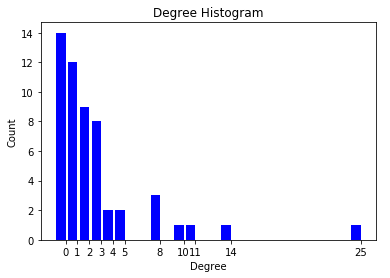

[25, 14, 11, 10, 8, 8, 8, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Log Log Plot


Text(0.5,0,'rank')

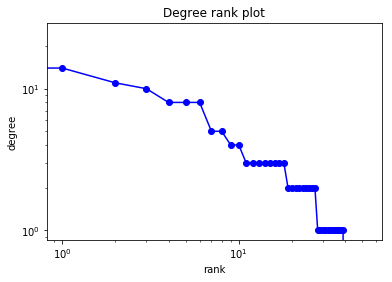

In [15]:
print('Question E')
import collections

def degree_histogram(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    # draw graph in inset
    plt.axes([0.4, 0.4, 0.5, 0.5])
    Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
    pos = nx.spring_layout(G)
    plt.axis('off')
    #nx.draw_networkx_nodes(G, pos, node_size=20)
    #nx.draw_networkx_edges(G, pos, alpha=0.4)

    plt.show()

    
print('Degree Distribution Histogram')
degree_histogram(mygraph)

degree_sequence = sorted([d for n, d in mygraph.degree()], reverse=True)  # degree sequence
print(degree_sequence)
print('Log Log Plot')
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

In [16]:
print('Question F')
print('degree assortativity')
print(nx.degree_assortativity_coefficient(mygraph))

Question F
degree assortativity
-0.3501198026033925


In [17]:
print('Question G')
print('The shortest paths between all the pairs of nodes')
pair=nx.all_pairs_shortest_path(mygraph)
for i in pair:
    print(i)

Question G
The shortest paths between all the pairs of nodes
('harry', {'harry': ['harry'], 'hermione': ['harry', 'hermione'], 'ron': ['harry', 'ron'], 'dursleys': ['harry', 'dursleys'], 'dumbledore': ['harry', 'dumbledore'], 'voldemort': ['harry', 'voldemort'], 'hagrid': ['harry', 'hagrid'], 'draco': ['harry', 'draco'], 'mcgonagall': ['harry', 'mcgonagall'], 'snape': ['harry', 'snape'], 'quirrell': ['harry', 'quirrell'], 'neville': ['harry', 'neville'], 'vernon': ['harry', 'vernon'], 'dudley': ['harry', 'dudley'], 'hedwig': ['harry', 'hedwig'], 'ollivander': ['harry', 'ollivander'], 'fred': ['harry', 'fred'], 'george': ['harry', 'george'], 'filch': ['harry', 'filch'], 'lee': ['harry', 'lee'], 'seamus': ['harry', 'seamus'], 'charlie': ['harry', 'charlie'], 'fang': ['harry', 'fang'], 'malkin': ['harry', 'malkin'], 'angelina': ['harry', 'angelina'], 'tom': ['harry', 'tom'], 'percy': ['harry', 'hermione', 'percy'], 'nicolas': ['harry', 'hermione', 'nicolas'], 'hooch': ['harry', 'hermione'

In [18]:
print('Question H')
print('Diameter of the graph')
try:
    print(nx.diameter(mygraph))
except:
    print('Diameter = infinity as not graph is not connected')

Question H
Diameter of the graph
Diameter = infinity as not graph is not connected


In [19]:
print('Question I')
print('Network density')
print(nx.density(mygraph))

Question I
Network density
0.05450733752620545


In [20]:
print('Question J')
a = nx.edge_betweenness_centrality(mygraph)
sorted_a = sorted(a.items(), key=lambda i: i[1], reverse=True)[:5] 

for i in sorted_a:
    print(i)

Question J
(('harry', 'dudley'), 0.050878890501532)
(('ron', 'flitwick'), 0.05031446540880503)
(('harry', 'ron'), 0.04600512462147683)
(('harry', 'hermione'), 0.032168518646506064)
(('harry', 'neville'), 0.029466573491730732)


Question K
the top 3 nodes ( in terms of degree centrality), draw the ego network and list their alters

Top three nodes
[('harry', 0.4716981132075472), ('ron', 0.2641509433962264), ('hermione', 0.20754716981132074)]


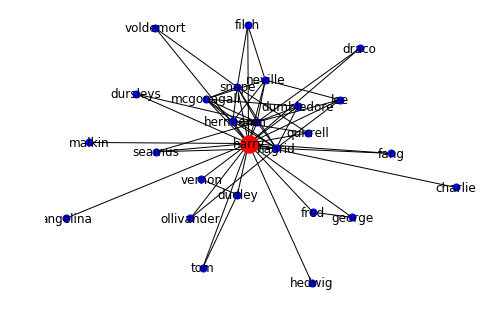

Alters: 
hermione ron dursleys dumbledore voldemort hagrid draco mcgonagall snape quirrell neville vernon dudley hedwig ollivander fred george filch lee seamus charlie fang malkin angelina tom 

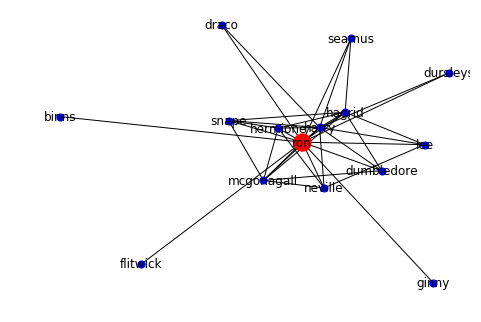

Alters: 
harry hermione dursleys dumbledore hagrid draco mcgonagall snape neville lee seamus flitwick binns ginny 

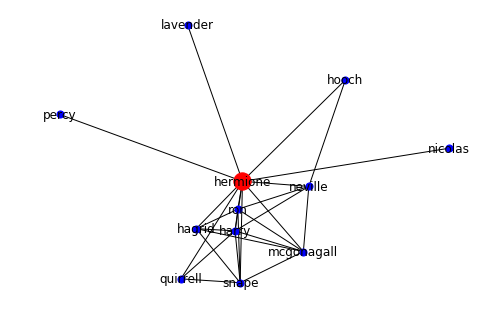

Alters: 
harry ron hagrid mcgonagall snape quirrell neville percy nicolas hooch lavender 

In [21]:
print('Question K')
print('the top 3 nodes ( in terms of degree centrality), draw the ego network and list their alters\n')
a = nx.degree_centrality(mygraph)
import operator
sorted_by_value = sorted(a.items(), key=lambda kv: kv[1],reverse=True)
print('Top three nodes')
print(sorted_by_value[:3])
for i,j in sorted_by_value[:3]:
    ego = nx.ego_graph(mygraph,i)
    pos = nx.spring_layout(ego)
    nx.draw(ego,pos,node_color='b',node_size=50,with_labels=True)
    nx.draw_networkx_nodes(ego,pos,nodelist=[i],node_size=300,node_color='r')
    plt.show()
    print('Alters: ')
    for k in mygraph.neighbors(i):
        print(k + ' ' , end='')

In [22]:
print('Question L')
print('Similarity between nodes\n')
a = nx.jaccard_coefficient(mygraph, ebunch=None)
for i,j,k in a:
    print(i, ' ', j , ' -> ', k)
a = sorted(nx.jaccard_coefficient(mygraph, ebunch=None),key = lambda x:x[2],reverse=True)[:5]
print('\nMost similar')
print(a)

Question L
Similarity between nodes

snape   malkin  ->  0.125
snape   griphook  ->  0.0
snape   flitwick  ->  0.1111111111111111
snape   trevor  ->  0.0
snape   pomfrey  ->  0.0
snape   angelina  ->  0.125
snape   cornelius  ->  0.0
snape   dumbledore  ->  0.4444444444444444
snape   fluffy  ->  0.0
snape   lavender  ->  0.125
snape   tom  ->  0.1111111111111111
snape   neville  ->  0.45454545454545453
snape   vincent  ->  0.0
snape   charlie  ->  0.1111111111111111
snape   ollivander  ->  0.25
snape   oliver  ->  0.0
snape   sirius  ->  0.125
snape   sprout  ->  0.0
snape   piers  ->  0.0
snape   draco  ->  0.25
snape   lily  ->  0.0
snape   augusta  ->  0.0
snape   gregory  ->  0.0
snape   marcus  ->  0.0
snape   vernon  ->  0.1
snape   molly  ->  0.0
snape   hooch  ->  0.1111111111111111
snape   george  ->  0.1
snape   nicolas  ->  0.1111111111111111
snape   fred  ->  0.1
snape   dudley  ->  0.08333333333333333
snape   alicia  ->  0.0
snape   fang  ->  0.25
snape   ginny  ->  0.125


angelina   gregory  ->  0.0
angelina   marcus  ->  0.0
angelina   vernon  ->  0.3333333333333333
angelina   molly  ->  0.0
angelina   hooch  ->  0.0
angelina   george  ->  0.3333333333333333
angelina   nicolas  ->  0.0
angelina   fred  ->  0.3333333333333333
angelina   dudley  ->  0.2
angelina   alicia  ->  0.0
angelina   ron  ->  0.07142857142857142
angelina   fang  ->  0.5
angelina   ginny  ->  0.0
angelina   james  ->  0.0
angelina   katie  ->  0.0
angelina   mcgonagall  ->  0.125
angelina   hagrid  ->  0.1
angelina   seamus  ->  0.3333333333333333
angelina   hedwig  ->  1.0
angelina   gellert  ->  0.0
angelina   dursleys  ->  0.3333333333333333
angelina   lee  ->  0.25
angelina   binns  ->  0.0
angelina   petunia  ->  0.0
angelina   percy  ->  0.0
angelina   irma  ->  0.0
quirrell   cornelius  ->  0.0
quirrell   tom  ->  0.25
quirrell   dumbledore  ->  0.14285714285714285
quirrell   fluffy  ->  0.0
quirrell   lavender  ->  0.3333333333333333
quirrell   neville  ->  0.22222222222222

vincent   charlie  ->  0.0
vincent   ollivander  ->  0.0
vincent   oliver  ->  0
vincent   sirius  ->  0.0
vincent   sprout  ->  0.0
vincent   hermione  ->  0.0
vincent   piers  ->  0.0
vincent   draco  ->  0.0
vincent   voldemort  ->  0.0
vincent   lily  ->  0.0
vincent   augusta  ->  0
vincent   gregory  ->  0
vincent   marcus  ->  0
vincent   vernon  ->  0.0
vincent   molly  ->  0
vincent   hooch  ->  0.0
vincent   george  ->  0.0
vincent   nicolas  ->  0.0
vincent   fred  ->  0.0
vincent   dudley  ->  0.0
vincent   alicia  ->  0
vincent   ron  ->  0.0
vincent   fang  ->  0.0
vincent   ginny  ->  0.0
vincent   james  ->  0.0
vincent   katie  ->  0
vincent   mcgonagall  ->  0.0
vincent   hagrid  ->  0.0
vincent   seamus  ->  0.0
vincent   hedwig  ->  0.0
vincent   gellert  ->  0
vincent   dursleys  ->  0.0
vincent   lee  ->  0.0
vincent   binns  ->  0.0
vincent   petunia  ->  0.0
vincent   percy  ->  0.0
vincent   irma  ->  0
filch   charlie  ->  0.25
filch   ollivander  ->  0.25
fil

augusta   fang  ->  0.0
augusta   ginny  ->  0.0
augusta   james  ->  0.0
augusta   katie  ->  0
augusta   mcgonagall  ->  0.0
augusta   hagrid  ->  0.0
augusta   seamus  ->  0.0
augusta   hedwig  ->  0.0
augusta   gellert  ->  0
augusta   dursleys  ->  0.0
augusta   hermione  ->  0.0
augusta   binns  ->  0.0
augusta   petunia  ->  0.0
augusta   percy  ->  0.0
augusta   irma  ->  0
gregory   marcus  ->  0
gregory   vernon  ->  0.0
gregory   molly  ->  0
gregory   hooch  ->  0.0
gregory   george  ->  0.0
gregory   nicolas  ->  0.0
gregory   fred  ->  0.0
gregory   dudley  ->  0.0
gregory   alicia  ->  0
gregory   ron  ->  0.0
gregory   fang  ->  0.0
gregory   ginny  ->  0.0
gregory   james  ->  0.0
gregory   katie  ->  0
gregory   mcgonagall  ->  0.0
gregory   hagrid  ->  0.0
gregory   seamus  ->  0.0
gregory   hedwig  ->  0.0
gregory   gellert  ->  0
gregory   dursleys  ->  0.0
gregory   hermione  ->  0.0
gregory   binns  ->  0.0
gregory   petunia  ->  0.0
gregory   percy  ->  0.0
greg

In [23]:
print('Question M')
print('clustering coefficients of each node')
print(nx.clustering(mygraph))

print('the global clustering coefficient')
print(nx.average_clustering(mygraph))

Question M
clustering coefficients of each node
{'harry': 0.11, 'hermione': 0.2909090909090909, 'ron': 0.25274725274725274, 'dursleys': 0.3333333333333333, 'dumbledore': 0.6, 'voldemort': 1.0, 'hagrid': 0.4222222222222222, 'draco': 1.0, 'mcgonagall': 0.5714285714285714, 'snape': 0.5, 'quirrell': 1.0, 'neville': 0.35714285714285715, 'vernon': 0.6666666666666666, 'petunia': 0.3333333333333333, 'dudley': 0.3, 'hedwig': 0, 'ollivander': 1.0, 'fred': 0.6666666666666666, 'george': 0.6666666666666666, 'james': 0, 'lily': 0, 'molly': 0, 'percy': 0.16666666666666666, 'filch': 0.6666666666666666, 'nicolas': 0, 'oliver': 0, 'lee': 0.8333333333333334, 'seamus': 1.0, 'charlie': 0, 'vincent': 0, 'gregory': 0, 'hooch': 1.0, 'fang': 1.0, 'fluffy': 0, 'griphook': 0, 'malkin': 0, 'cornelius': 0, 'lavender': 0, 'pomfrey': 0, 'katie': 0, 'angelina': 0, 'marcus': 0, 'irma': 0, 'alicia': 0, 'flitwick': 0, 'sprout': 0, 'binns': 0, 'piers': 0, 'augusta': 0, 'trevor': 0, 'ginny': 0, 'gellert': 0, 'tom': 1.0, '

Question N
Detect cliques and Cores

Cliques
[['griphook'], ['harry', 'fang', 'hagrid'], ['harry', 'malkin'], ['harry', 'filch', 'snape'], ['harry', 'filch', 'neville'], ['harry', 'dudley', 'vernon'], ['harry', 'dudley', 'tom'], ['harry', 'charlie'], ['harry', 'ollivander', 'hagrid'], ['harry', 'hedwig'], ['harry', 'george', 'fred'], ['harry', 'angelina'], ['harry', 'voldemort', 'snape'], ['harry', 'quirrell', 'snape', 'hermione'], ['harry', 'ron', 'hagrid', 'lee'], ['harry', 'ron', 'hagrid', 'seamus'], ['harry', 'ron', 'hagrid', 'mcgonagall', 'snape', 'hermione'], ['harry', 'ron', 'hagrid', 'mcgonagall', 'dumbledore'], ['harry', 'ron', 'draco'], ['harry', 'ron', 'dursleys'], ['harry', 'ron', 'neville', 'lee'], ['harry', 'ron', 'neville', 'mcgonagall', 'hermione'], ['flitwick', 'sprout'], ['flitwick', 'ron'], ['trevor', 'neville'], ['pomfrey'], ['cornelius'], ['lavender', 'hermione'], ['fluffy'], ['vincent'], ['oliver'], ['sirius', 'mcgonagall'], ['piers', 'dudley'], ['lily', 'james'],

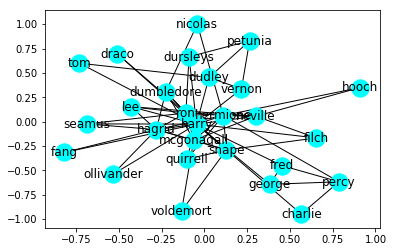

3 Core


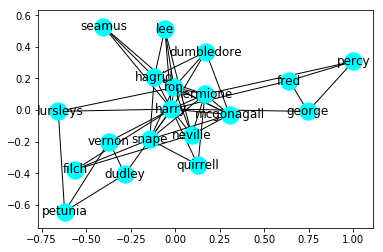

4 Core


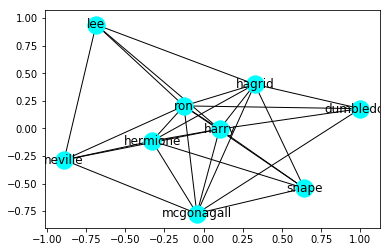

5 Core


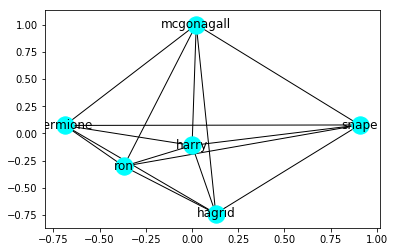

In [24]:
print('Question N')  
print('Detect cliques and Cores')

print('\nCliques')
a = list(nx.find_cliques(mygraph))
print(a)

print('\nCores')
for i in range(2,6):
    print(str(i) + ' Core')
    cores = nx.k_core(mygraph,i)
    nx.draw_networkx(cores,node_color='cyan')
    plt.show()

Question O
Detect community using Louvain and Clique percolation methods

Louvain Method
{'harry': 0, 'hermione': 0, 'ron': 0, 'dursleys': 1, 'dumbledore': 0, 'voldemort': 2, 'hagrid': 0, 'draco': 0, 'mcgonagall': 3, 'snape': 2, 'quirrell': 2, 'neville': 3, 'vernon': 1, 'petunia': 1, 'dudley': 1, 'hedwig': 0, 'ollivander': 0, 'fred': 4, 'george': 4, 'james': 5, 'lily': 5, 'molly': 6, 'percy': 4, 'filch': 2, 'nicolas': 0, 'oliver': 7, 'lee': 0, 'seamus': 0, 'charlie': 4, 'vincent': 8, 'gregory': 9, 'hooch': 3, 'fang': 0, 'fluffy': 10, 'griphook': 11, 'malkin': 0, 'cornelius': 12, 'lavender': 0, 'pomfrey': 13, 'katie': 14, 'angelina': 0, 'marcus': 15, 'irma': 16, 'alicia': 17, 'flitwick': 18, 'sprout': 18, 'binns': 0, 'piers': 1, 'augusta': 19, 'trevor': 3, 'ginny': 0, 'gellert': 20, 'tom': 1, 'sirius': 3}


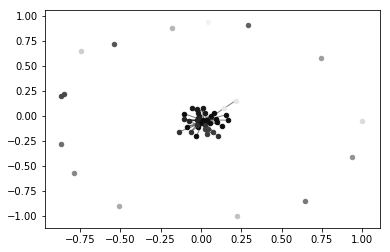

Clique Percolation Method
[frozenset({'snape', 'harry', 'hooch', 'quirrell', 'dumbledore', 'ron', 'fang', 'hermione', 'neville', 'mcgonagall', 'filch', 'voldemort', 'hagrid', 'seamus', 'ollivander', 'dursleys', 'lee', 'draco'}), frozenset({'harry', 'tom', 'dudley', 'petunia', 'vernon'}), frozenset({'fred', 'percy', 'harry', 'george'})]


In [25]:
print('Question O')
print('Detect community using Louvain and Clique percolation methods\n')
from networkx.algorithms.community import k_clique_communities
import community

print('Louvain Method')
partition = community.best_partition(mygraph)
print(partition)
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(mygraph)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(mygraph, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(mygraph, pos, alpha=0.5)
plt.show()


print('Clique Percolation Method')
print(list(k_clique_communities(mygraph,3)))